In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sb
import matplotlib
import pandas as pd
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
vmean_all = np.load('../FILES/vmean_all_rep_RNN_4.npy')
trials_all = np.load('../FILES/trials_all_rep_RNN_4.npy')
vmean = vmean_all[2]
trials = trials_all[2]
K = 100
tr_len = 26

In [3]:
trials = np.array(trials)
vmean = np.array(vmean)
vmean0 = np.zeros((K,tr_len, np.sum(trials==0)))
vmean1 = np.zeros((K,tr_len, np.sum(trials==1)))
count0 = 0
count1 = 0

for counter in range(0, 1900):##len(trials)):
    ##print(counter)
    trial = trials[counter]
    if trial ==0:
        vmean0[:, :, count0] = vmean[counter*tr_len:(1+counter)*tr_len,:].T
        count0 = count0 +1
    else:
        vmean1[:, :, count0] = vmean[counter*tr_len:(1+counter)*tr_len,:].T
        count1 = count1 + 1
    if counter >0:
        vmean_comb = np.dstack((vmean_comb, vmean[counter*tr_len:(1+counter)*tr_len,:].T))
    else:
        vmean_comb = vmean[counter*tr_len:(1+counter)*tr_len,:].T

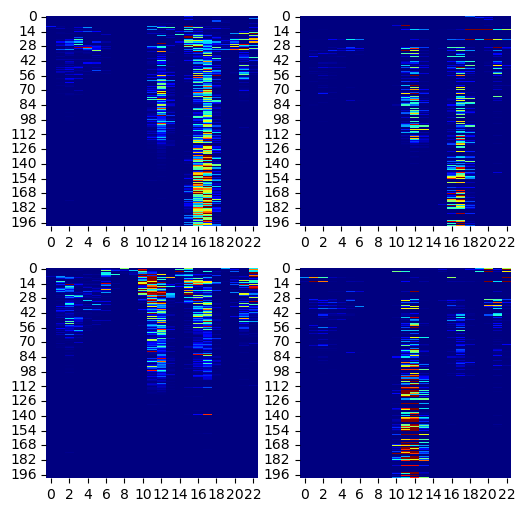

In [4]:
## Plotting example cells tuned to multiple gray regions
fig, axs= plt.subplots(2,2,figsize= (6,6))
i = 0
for neur in [62,63]:
    sb.heatmap(vmean0[neur,0:23,0:200].T, ax= axs[i,0], cmap = 'jet', cbar= False, vmin = 0,vmax = 100, rasterized = True)
    sb.heatmap(vmean1[neur,0:23,0:200].T, ax= axs[i,1],cmap = 'jet', cbar= False, vmin=0, vmax= 100, rasterized = True)
    i = i+1

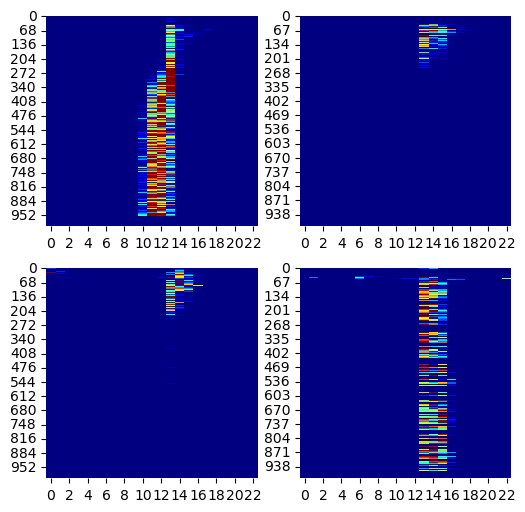

In [5]:
## Plotting example cells tuned to pre-R1 regions

fig, axs= plt.subplots(2,2,figsize= (6,6))
i = 0
for neur in [41,45]:
    sb.heatmap(vmean0[neur,0:23,:].T, ax= axs[i,0], cmap = 'jet',vmin = 0,vmax = 100, rasterized = True,cbar= False)
    sb.heatmap(vmean1[neur,0:23,:].T, ax= axs[i,1],cmap = 'jet', cbar= False, vmin=0, vmax= 100, rasterized = True)
    i = i+1

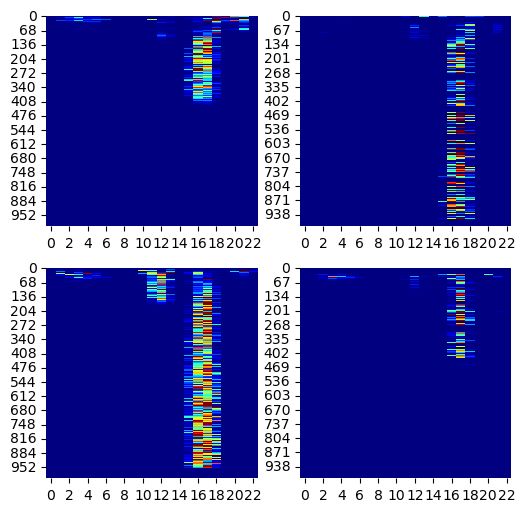

In [6]:
fig, axs= plt.subplots(2,2,figsize= (6,6))
i = 0
for neur in [38,95]:
    
    sb.heatmap(vmean0[neur,0:23,:].T, ax= axs[i,0], cmap = 'jet', cbar= False, vmin = 0,vmax = 100, rasterized = True)
    ##axs[0].set_yticks([])

    sb.heatmap(vmean1[neur,0:23,:].T, ax= axs[i,1],cmap = 'jet', cbar= False, vmin=0, vmax= 100, rasterized = True)
    i = i+1

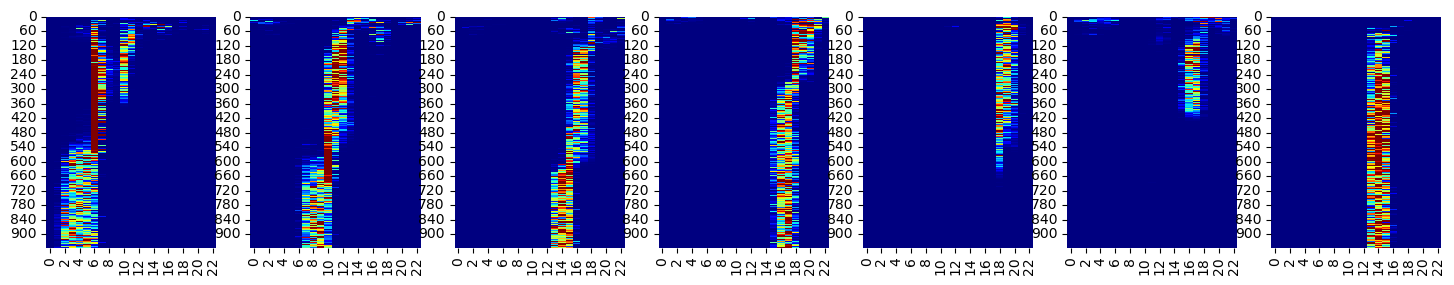

In [7]:
fig, axs= plt.subplots(1,7,figsize= (18,3))
figcount = 0
for neur in [34,57,13,99,65,38,49]:
    sb.heatmap(vmean0[neur,0:23,:-50].T, ax= axs[figcount], cmap = 'jet', cbar= False, vmin = 0,vmax = 100, rasterized = True)
    ##axs[figcount].set_yticks([])
    figcount = figcount+1

In [8]:
activity_thresh = 10*10**-2
def plot_sort_neurs(start, stop, sort_based_on, axs, axs2, limited):
    neur0 = np.mean(vmean0[:,:,start:stop], axis = 2)
    neur1 = np.mean(vmean1[:,:,start:stop], axis = 2)

    
    if sort_based_on == 0:
        curr_order = np.argmax(neur0,axis = 1)
        plot_yes = np.max(neur0,axis = 1)> activity_thresh 
        
    else:
        curr_order = np.argmax(neur1,axis = 1)
        plot_yes = np.max(neur1,axis = 1)> activity_thresh

    new_plot_order0=np.zeros_like(neur0)
    new_plot_order1=np.zeros_like(neur0)
    neur_count = 0
    for i in range(0, tr_len):
        for neur in range(0,K):
            if curr_order[neur]== i and (plot_yes[neur]== True or limited == False):
                new_plot_order0[neur_count] = neur0[neur,:]
                new_plot_order1[neur_count] = neur1[neur,:]
                neur_count = neur_count+1
    new_plot_order0= new_plot_order0[0:neur_count]
    new_plot_order1= new_plot_order1[0:neur_count]

    sb.heatmap(new_plot_order0/np.max(new_plot_order0), vmax = 1,cmap = 'Greys', cbar= False, ax = axs)
    axs.set_title('Near')
    axs.set_xticks([])
    sb.heatmap(new_plot_order1/np.max(new_plot_order1), vmax = 1,cmap = 'Greys', ax = axs2,cbar= False )
    axs2.set_title('Far')
    axs2.set_xticks([])
    
    for m in np.array([np.zeros(2),np.shape(new_plot_order0)]):
        axs.axhline(m[0], color = 'black')
        axs.axvline(m[1], color = 'black')
    for m in np.array([np.zeros(2),np.shape(new_plot_order1)]):
        axs2.axhline(m[0], color = 'black')
        axs2.axvline(m[1], color = 'black')

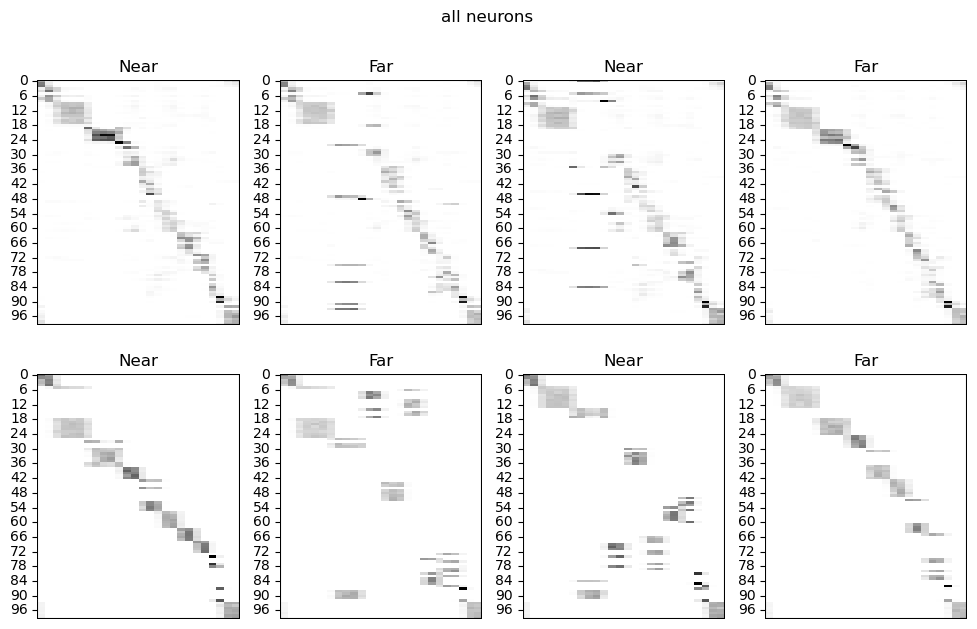

In [9]:
fig, axs= plt.subplots(2,4,figsize=(12,7))
plot_sort_neurs(0, 200, 0, axs[0,0], axs[0,1], limited = False)
plot_sort_neurs(0, 200, 1, axs[0,2], axs[0,3], limited = False)

plot_sort_neurs(-200, -1, 0, axs[1,0], axs[1,1],limited = False)
plot_sort_neurs(-200, -1, 1, axs[1,2], axs[1,3],limited = False)
fig.suptitle('all neurons')
plt.show()

Text(0.5, 0.98, 'Limited neurons Expert')

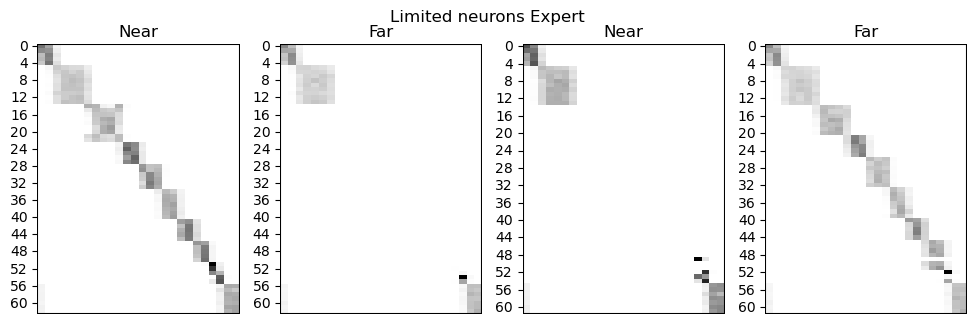

In [10]:
fig, axs= plt.subplots(1,4,figsize=(12,3.5))

plot_sort_neurs(-200, -1, 0, axs[0], axs[1], limited = True)
plot_sort_neurs(-200, -1, 1, axs[2], axs[3], limited = True)
fig.suptitle('Limited neurons Expert')